<a href="https://colab.research.google.com/github/yashguptaab99/Directing-Customers-to-Subscription-Through-App-Behavior-Analysis/blob/master/Directing_Customers_to_Subscription_Through_App_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [4]:
#### Importing Libraries ####
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Importing Dataset and Cleaning

In [5]:
dataset = pd.read_csv('appdata10.csv')

In [6]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [7]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [9]:
dataset['hour']

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int64

In [10]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


# Visualizaing Data

<Figure size 432x288 with 0 Axes>

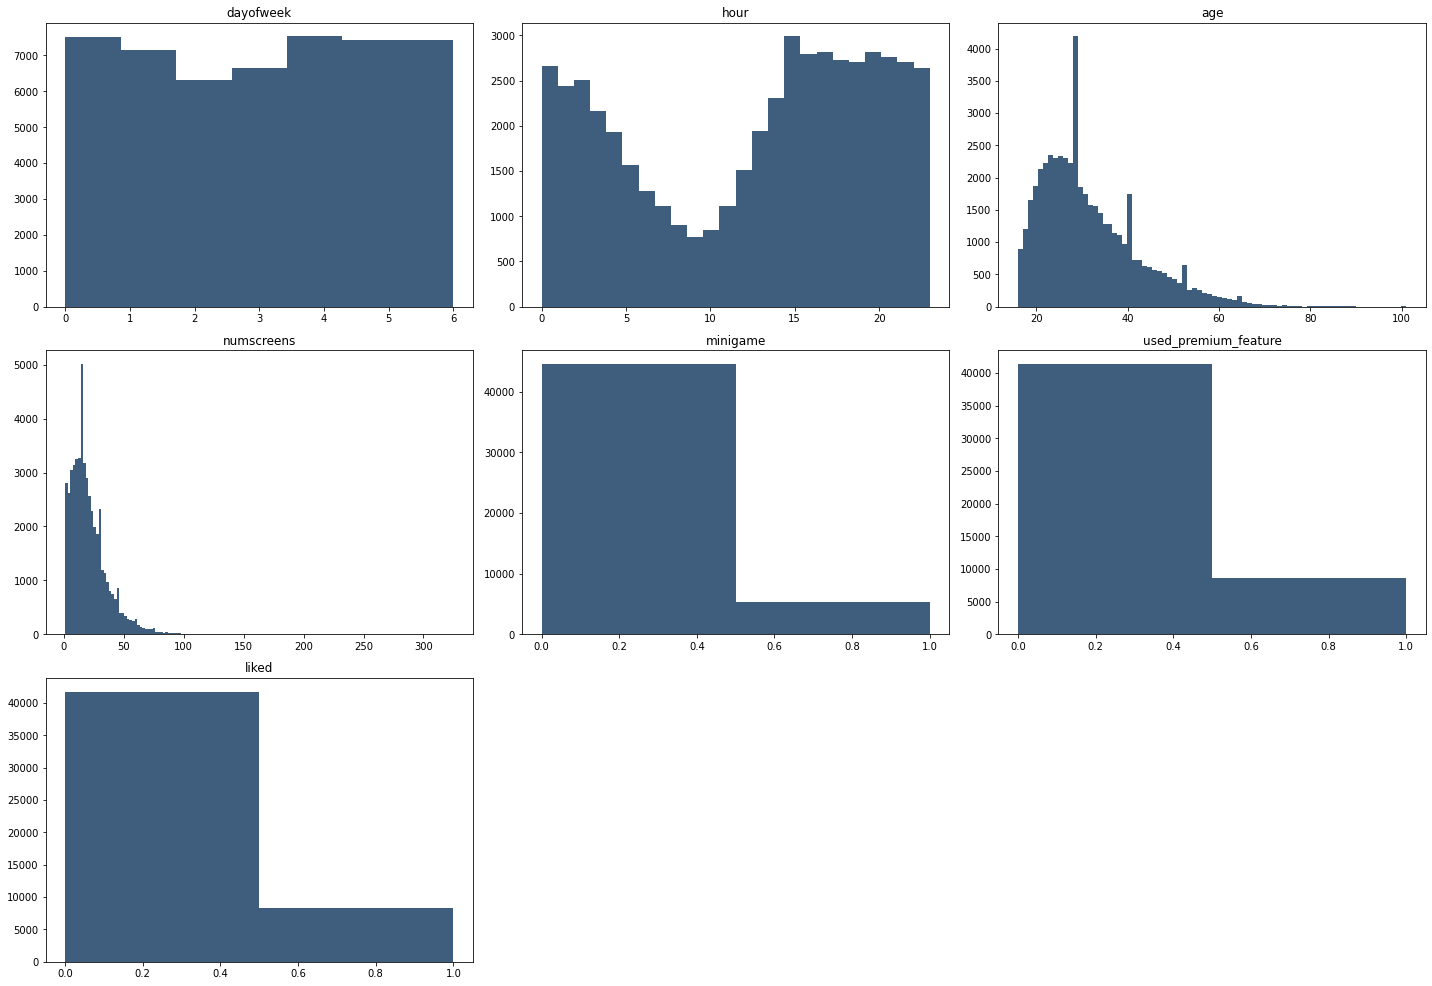

In [11]:
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
plt.figure(figsize=(20,15))
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

## Correlation with Response Variable

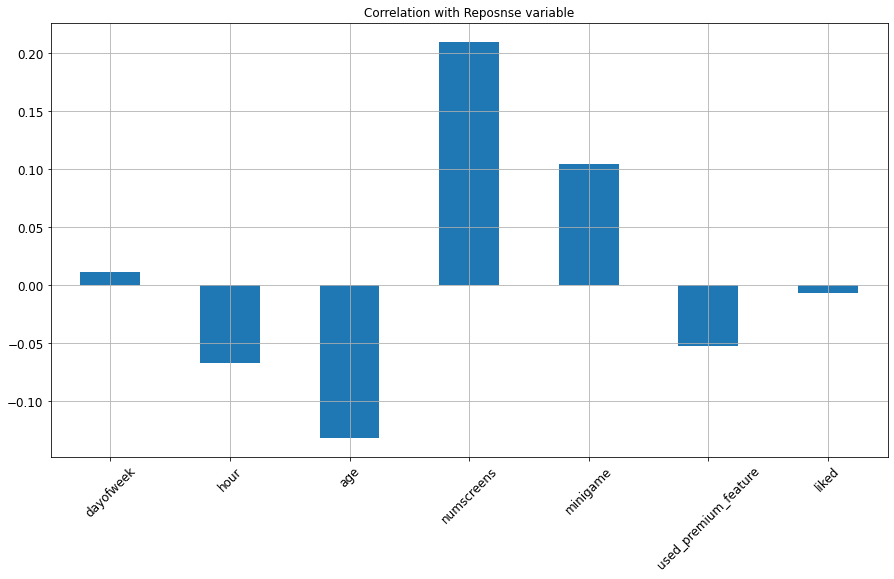

In [12]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(15,8),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 12, rot = 45,
                  grid = True)

## Correlation Matrix

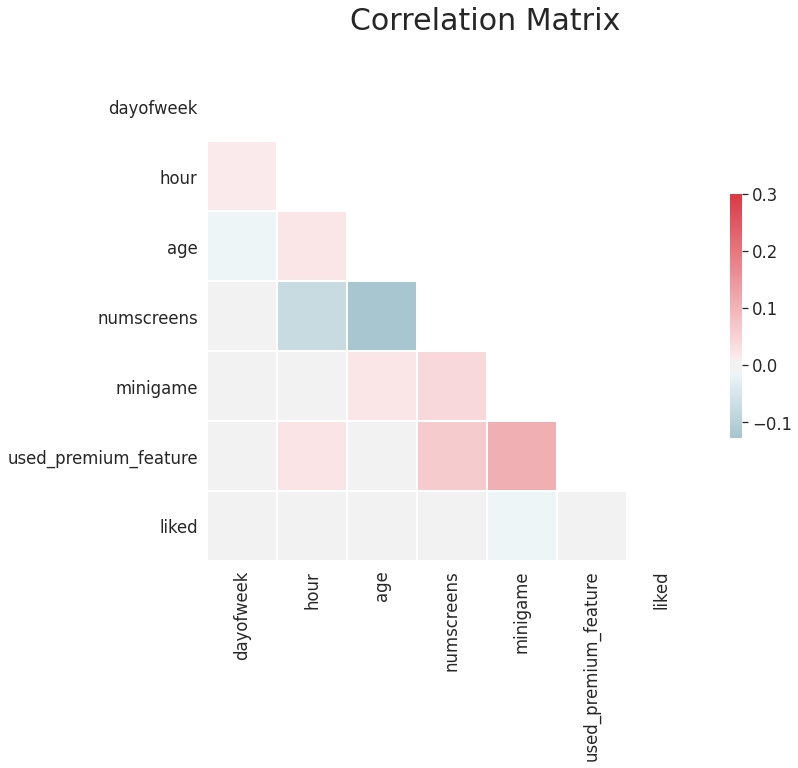

In [13]:
sn.set(style="white", font_scale=1.5)
# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
f.suptitle("Correlation Matrix", fontsize = 30)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature Engineering

## Feature Engineering - Response
The main part of our model is fine tuning the response. Is important because we need to set a limit on when we speak a user to Subscribe. For example if we have a time limit of one week for enrollments to consider then we only need to wait one week or so to check if the model was accurate in predicting that use. But model was to protect an all time enrollment then we will have to wait until the end of all time to see if the model was accurate or not. So that is why it is important to have a particular date range limits on our responsibility to understand what time limit is optimal.

We're going to plot our time differences between the first open and the enrolled date. Then we can know how much time should we wait to approach user for subscription. 

**According to plot we can see that usually user enrolled in first 10 hours of app use, so we will wait for 2 days that is 48 hrs**


In [14]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [15]:
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

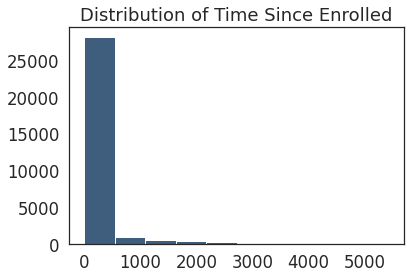

In [16]:
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time Since Enrolled')
plt.show()

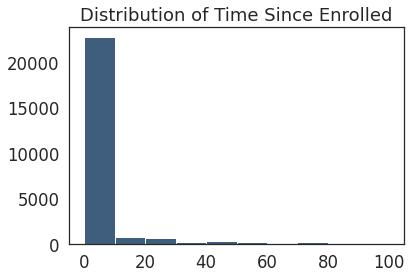

In [17]:
plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time Since Enrolled')
plt.show()

In [18]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

## Feature Engineering - Screens

There is screen_list coloumn which is not processed data that can be used for building model, it is necessary to pre-process it. 

1) We know which are screen that are important for our analysis **top_screens.csv** file contains name of them, now we create all columns of top screens and keep record that how many times user visited them.
 
2) Now there are screen which are of same category for ex, saving1, saving2, etc, so know we will create one column for all similiar screens and keep there individual count.

In [19]:
# Load Top Screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [20]:
# Mapping Screens to Fields (keep count of screen)
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

In [21]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [22]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [23]:
# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [24]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


In [25]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23

In [26]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

# Importing New Data

In [33]:
dataset = pd.read_csv('new_appdata10.csv')
dataset.head()
y = dataset.enrolled
X = dataset.drop(columns = 'enrolled')

In [34]:
X

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0


In [35]:
y

0        0
1        0
2        0
3        1
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    0
Name: enrolled, Length: 50000, dtype: int64

# Splitting the dataset into the Training set and Test set

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [43]:
X_train.shape

(40000, 49)

In [44]:
X_test.shape

(10000, 49)

In [45]:
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [46]:
X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
18165,6,1,23,16,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,7,0,0,0
36059,0,19,28,20,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
13242,5,19,25,20,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,3,0,1
32985,1,10,50,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,1,0
41133,5,13,24,39,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,4,18,29,10,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,1
32511,1,15,38,12,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
5192,2,21,33,28,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4,3,0,0
12172,5,18,51,20,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,1


In [47]:
X_test

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
26247,3,22,19,25,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,4,0,1
35067,2,13,20,41,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,10,4,3,2,0
34590,1,14,24,9,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0
16668,1,2,18,14,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,1
12196,5,0,31,19,1,0,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49858,6,23,36,11,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0
19849,0,0,20,21,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10,0,1,0,0
46899,1,3,25,12,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0
28256,0,18,47,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1


In [48]:
train_identity

18165    158163
36059     45397
13242    338384
32985     19288
41133    170113
          ...  
43723    144148
32511    129693
5192     273601
12172     49769
33003    272008
Name: user, Length: 40000, dtype: int64

In [50]:
test_identity

26247    356839
35067     50476
34590    139338
16668     21025
12196     53743
          ...  
49858    168496
19849    283746
46899    327980
28256    104563
43070    165849
Name: user, Length: 10000, dtype: int64

# Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns.values, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns.values, index = X_test.index)

In [52]:
X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
18165,1.461526,-1.553887,-0.809274,-0.326778,-0.347870,-0.457413,-0.445576,0.96651,-0.645392,-1.050367,-0.686980,-0.946148,2.307403,-0.857574,-0.757381,1.39264,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,4.191671,4.584137,-0.178191,4.790835,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.878485,4.683504,-0.762013,-0.288394,-1.166293
36059,-1.491325,0.863914,-0.346435,-0.071547,-0.347870,-0.457413,-0.445576,0.96651,1.549446,0.952048,-0.686980,1.056917,-0.433388,1.166080,-0.757381,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.332817,-0.262230,-0.762013,-0.288394,0.311711
13242,0.969384,0.863914,-0.624139,-0.071547,-0.347870,-0.457413,-0.445576,-1.03465,-0.645392,0.952048,1.455647,-0.946148,-0.433388,1.166080,-0.757381,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,0.758520,-0.262230,1.706311,-0.288394,0.311711
32985,-0.999183,-0.344987,1.690057,-0.582008,-0.347870,-0.457413,-0.445576,-1.03465,-0.645392,-1.050367,-0.686980,1.056917,-0.433388,-0.857574,-0.757381,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,4.191671,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.878485,-0.262230,1.706311,1.340722,-1.166293
41133,0.969384,0.057980,-0.716706,1.140796,-0.347870,-0.457413,-0.445576,0.96651,-0.645392,0.952048,-0.686980,1.056917,-0.433388,1.166080,1.320339,1.39264,-0.503162,-0.302185,-0.224851,3.476925,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,1.577022,-0.262230,0.060762,-0.288394,0.311711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.477242,0.729592,-0.253867,-0.709623,2.874639,-0.457413,-0.445576,-1.03465,-0.645392,-1.050367,-0.686980,-0.946148,-0.433388,-0.857574,1.320339,1.39264,1.987431,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.059983,-0.262230,-0.762013,-0.288394,0.311711
32511,-0.999183,0.326625,0.579243,-0.582008,-0.347870,-0.457413,-0.445576,0.96651,-0.645392,0.952048,-0.686980,1.056917,-0.433388,1.166080,-0.757381,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,

In [53]:
X_test

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
26247,-0.014900,1.266881,-1.179546,0.247490,-0.347870,-0.457413,-0.445576,-1.03465,1.549446,0.952048,-0.686980,-0.946148,-0.433388,-0.857574,-0.757381,1.39264,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.151630,-0.173889,-0.14779,3.045898,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.059983,-0.262230,2.529086,-0.288394,0.311711
35067,-0.507041,0.057980,-1.086978,1.268411,-0.347870,2.186209,-0.445576,0.96651,-0.645392,0.952048,1.455647,-0.946148,-0.433388,1.166080,-0.757381,-0.71806,-0.503162,-0.302185,4.447384,-0.287610,-0.281916,-0.23379,-0.238568,4.584137,-0.178191,4.790835,-0.224974,0.0,4.588106,4.831740,-0.155553,-0.164429,6.407885,5.529072,6.594989,-0.173889,-0.14779,3.045898,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,1.031354,2.563904,1.706311,2.969837,-1.166293
34590,-0.999183,0.192302,-0.716706,-0.773431,-0.347870,-0.457413,2.244287,-1.03465,-0.645392,-1.050367,-0.686980,-0.946148,-0.433388,-0.857574,1.320339,1.39264,1.987431,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.151630,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.332817,-0.262230,-0.762013,-0.288394,-1.166293
16668,-0.999183,-1.419565,-1.272114,-0.454393,-0.347870,-0.457413,2.244287,0.96651,-0.645392,0.952048,-0.686980,1.056917,-0.433388,1.166080,1.320339,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.151630,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,0.212852,-0.262230,-0.762013,-0.288394,0.311711
12196,0.969384,-1.688209,-0.068732,-0.135355,2.874639,-0.457413,-0.445576,0.96651,-0.645392,0.952048,1.455647,1.056917,-0.433388,1.166080,1.320339,1.39264,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.151630,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,1.577022,-0.262230,-0.762013,-0.288394,-1.166293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49858,1.461526,1.401203,0.394108,-0.645815,2.874639,2.186209,-0.445576,-1.03465,-0.645392,-1.050367,-0.686980,-0.946148,2.307403,-0.857574,-0.757381,-0.71806,-0.503162,-0.302185,4.447384,3.476925,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.151630,-0.173889,-0.14779,-0.328310,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.332817,-0.262230,-0.762013,-0.288394,-1.166293
19849,-1.491325,-1.688209,-1.086978,-0.007740,-0.347870,-0.457413,2.244287,0.96651,-0.645392,0.952048,1.455647,1.056917,-0.433388,1.166080,1.320339,1.39264,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.151630,-0.173889,-0.14779,-0.328310,8.222569,-0.11443,-0.115768,-0.089944,-0.0866

# Model Building

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [78]:
models = []
models.append(('DTC', DecisionTreeClassifier(criterion= 'entropy', random_state=0)))
models.append(('KNC', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)))
models.append(('LAR', LogisticRegression(random_state = 0, penalty = 'l1', solver = 'liblinear')))
models.append(('SVC', SVC()))
models.append(('XGB', XGBClassifier()))

In [79]:
results = []
names = []
kFold = []

for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracies = accuracy_score(y_test, y_pred)
  fold = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
  results.append(accuracies*100)
  names.append(name)
  kFold.append(fold.mean()*100)
final_comparion = pd.DataFrame(list(zip(names, results, kFold)), columns = ['Model Name', 'Accuracy', 'K-Fold'])


In [80]:
print(results)

[0.7002, 0.7291, 0.7136, 0.7657, 0.7681, 0.7753, 0.7787]


In [81]:
print(names)

['DTC', 'KNC', 'NB', 'RFC', 'LAR', 'SVC', 'XGB']


In [82]:
print(kFold)

[70.025, 73.36749999999999, 71.55, 76.22000000000001, 76.74499999999999, 77.86000000000001, 77.7975]


In [83]:
final_comparion

,Model Name,Accuracy,K-Fold
0,DTC,0.7002,70.0250
1,KNC,0.7291,73.3675
2,NB,0.7136,71.5500
3,RFC,0.7657,76.2200
4,LAR,0.7681,76.7450
5,SVC,0.7753,77.8600
6,XGB,0.7787,77.7975


In [84]:
final_comparion.sort_values(by=['Accuracy'], ascending=False)

,Model Name,Accuracy,K-Fold
6,XGB,0.7787,77.7975
5,SVC,0.7753,77.8600
4,LAR,0.7681,76.7450
3,RFC,0.7657,76.2200
1,KNC,0.7291,73.3675
2,NB,0.7136,71.5500
0,DTC,0.7002,70.0250


We observ that Support Vector Classifier and XGBoost Classifier give best accuracy than ohter ML algorithm. But we will continue with XGBoost classifier because the accuracy is slightly higher than SVC.

### Parameter Tuning

In [85]:
# XGB classifier with parameter tuning
# train with Stander Scaling dataset
xgb_model = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
 
accuracy_score(y_test, y_pred)

0.7866

### Confusion Matrix

Text(0.5, 1.0, 'Confussion Matrix')

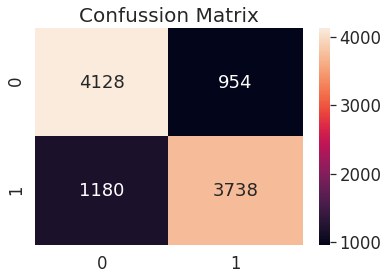

In [87]:
# confussion matrix
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 

### Classification report of ML model

In [89]:
cr = classification_report(y_test, y_pred)
print("Classification report >>> \n", cr)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      5082
           1       0.80      0.76      0.78      4918

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



### Mapping predicted output to the target

In [90]:
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [93]:
final_results

,user,enrolled,predicted_reach
0,356839,1,1
1,50476,1,1
2,139338,0,0
3,21025,1,1
4,53743,0,1
...,...,...,...
9995,168496,0,0
9996,283746,1,1
9997,327980,0,0
9998,104563,1,0
